In [1]:
rm(list=ls()) #clear all variables and packages
# Install and load packages
library(ggplot2)
install.packages("gridExtra", repos="http://cran.rstudio.com/")
library(gridExtra)
library(scales)


The downloaded source packages are in
	‘/private/var/folders/v9/6_3q92b512q408c7y9_mw55h0000gn/T/RtmphyB3RX/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
### JUST STREAMING GRAPH

### inputting the streaming dataframe ###

stream.data <- read.table("~/git/ep-streaming/output/streaming/2016-06-08-full-thru-diginorm/parsed.times", header = F, sep = " ")
names(stream.data) <- c("Steps", "Event", "Stamp")
stream.data$Steps <- as.factor(stream.data$Steps) #converting values into factors
stream.data$Event <- as.factor(stream.data$Event)
stream.data$Stamp <- as.numeric(stream.data$Stamp)

streamingsteps <- length(levels(stream.data$Steps)) # handy variable for later

In [3]:
# create data (type==matrix) to fake distributions

fake.stream.data <- data.frame(matrix(NA, nrow = (streamingsteps)*6, ncol = 3, dimnames = list(NULL,c('Steps','Time','Method'))))
fake.stream.data$Steps <- c(rep(levels(stream.data$Steps), each=6))
fake.stream.data$Method <- c(rep('Streaming', streamingsteps*6))

# repeat start and end times five times

for (each in levels(stream.data$Steps)) {
  start.incident <- which(stream.data$Steps==each & stream.data$Event=='START')
  done.incident <- which(stream.data$Steps==each & stream.data$Event=='DONE')
  fake.stream.data[which(fake.stream.data$Steps==each & fake.stream.data$Method=='Streaming'),2] <- c(rep(stream.data[start.incident,3],3),rep(stream.data[done.incident,3],3)) 
}

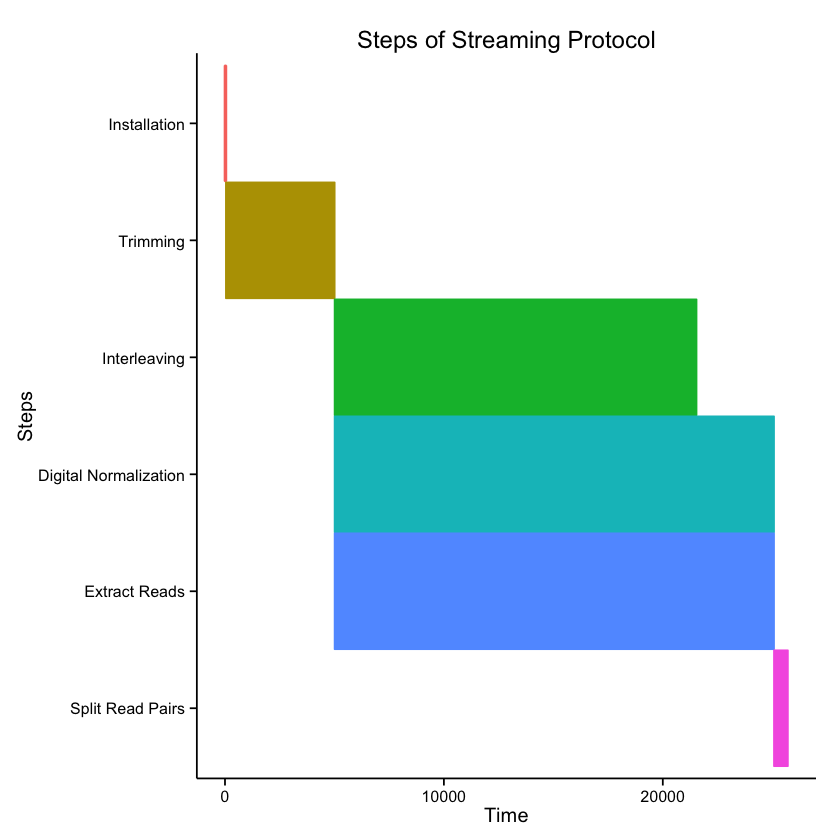

In [4]:
# designate pipeline steps as factors

fake.stream.data$Steps <- as.factor(fake.stream.data$Steps)
fake.stream.data$Time <- as.numeric(fake.stream.data$Time)

### build the plot, color by step
# coords will be flipped, steps on x

plot <- ggplot(fake.stream.data, aes(x=Steps, y=Time, color=Steps)) + ggtitle ("Steps of Streaming Protocol")
plot <- plot + geom_boxplot(aes(fill = factor(Steps)), width = 1.32)

# order steps by number

plot <- plot + scale_x_discrete(limits = rev(levels(fake.stream.data$Steps)), labels = rev(c("Installation", "Trimming", "Interleaving", "Digital Normalization", "Extract Reads", "Split Read Pairs")))  
plot <- plot + coord_flip()
 
plot + theme_classic() + theme(legend.position="none")

In [5]:
### JUST NONSTREAMING GRAPH

### inputting the nonstreaming dataframe ###
# note - using streaming step for now

nonstream.data <- read.table("~/git/ep-streaming/output/nonstreaming/2016-06-16-full-thru-diginorm-all-files/parsed.times", header = F, sep = " ")
names(nonstream.data) <- c("Steps", "Event", "Stamp")
nonstream.data$Steps <- as.factor(nonstream.data$Steps) 
nonstream.data$Event <- as.factor(nonstream.data$Event)
nonstream.data$Stamp <- as.numeric(nonstream.data$Stamp)

nonstreamingsteps <- length(levels(nonstream.data$Steps))

In [6]:
# create data (type==matrix) to fake distributions

fake.nonstream.data <- data.frame(matrix(NA, nrow = (nonstreamingsteps)*6, ncol = 3, dimnames = list(NULL,c('Steps','Time','Method'))))
fake.nonstream.data$Steps <- c(rep(levels(nonstream.data$Steps), each=6))
fake.nonstream.data$Method <- c(rep('Non-Streaming', nonstreamingsteps*6))

# repeat start and end times in matrix

for (every in levels(nonstream.data$Steps)) {
  indy1 <- which(nonstream.data$Steps==every & nonstream.data$Event=='START')
  indy2 <- which(nonstream.data$Steps==every & nonstream.data$Event=='DONE')
  fake.nonstream.data[which(fake.nonstream.data$Steps==every & fake.nonstream.data$Method=='Non-Streaming'),2] = c(rep(nonstream.data[indy1,3],3),rep(nonstream.data[indy2,3],3))
  # each in the correspoding matrix rows
}

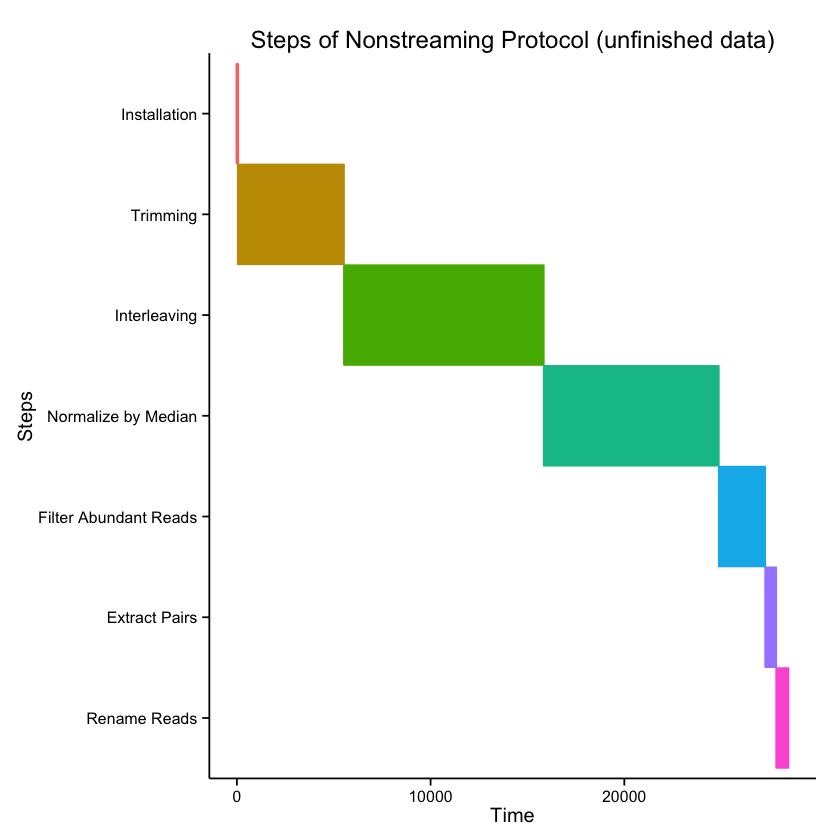

In [12]:
# designate pipeline steps as factors

fake.nonstream.data$Steps = as.factor(fake.nonstream.data$Steps)
fake.nonstream.data$Time = as.numeric(fake.nonstream.data$Time)

### build the plot, color by step
# coords will be flipped, steps on x

plot <- ggplot(fake.nonstream.data, aes(x=Steps, y=Time, color=Steps)) + ggtitle ("Steps of Nonstreaming Protocol (unfinished data)")
plot <- plot + geom_boxplot(aes(fill = factor(Steps)), width = 1.32)

# order steps by number
# note: need to fix data for streaming steps
plot <- plot + scale_x_discrete(limits = rev(levels(fake.nonstream.data$Steps)), labels = rev(c("Installation", "Trimming", "Interleaving", "Normalize by Median", "Filter Abundant Reads", "Extract Pairs", "Rename Reads")))  
plot <- plot + coord_flip()
 
plot + theme_classic() + theme(legend.position="none")

In [8]:
### STREAMING AND NONSTREAMING ON SAME GRAPH

# create new fake data with both streaming and nonstreaming variables

#creating fake data to graph from (type==matrix) with 'distributions'
# data2 = comb.fake.data
# data = stream.data
# data3 = nonstream.data
comb.fake.data <- data.frame(matrix(NA, nrow = (streamingsteps+nonstreamingsteps)*6, ncol = 3, dimnames = list(NULL,c('Steps','Time','Method'))))
comb.fake.data$Steps <- c(rep(levels(stream.data$Steps), each=6), rep(levels(nonstream.data$Steps),each=6))
comb.fake.data$Method <- c(rep('Streaming', streamingsteps*6),rep('Non-Streaming', nonstreamingsteps*6))


for (each in levels(stream.data$Steps)) {
  indy1 <- which(stream.data$Steps==each & stream.data$Event=='START')
  indy2 <- which(stream.data$Steps==each & stream.data$Event=='DONE')
  comb.fake.data[which(comb.fake.data$Steps==each & comb.fake.data$Method=='Streaming'),2] = c(rep(stream.data[indy1,3],3),rep(stream.data[indy2,3],3)) 
}

for (every in levels(nonstream.data$Steps)) {
  indy1 <- which(nonstream.data$Steps==every & nonstream.data$Event=='START')
  indy2 <- which(nonstream.data$Steps==every & nonstream.data$Event=='DONE')
  comb.fake.data[which(comb.fake.data$Steps==every & comb.fake.data$Method=='Non-Streaming'),2] = c(rep(nonstream.data[indy1,3],3),rep(nonstream.data[indy2,3],3))
}

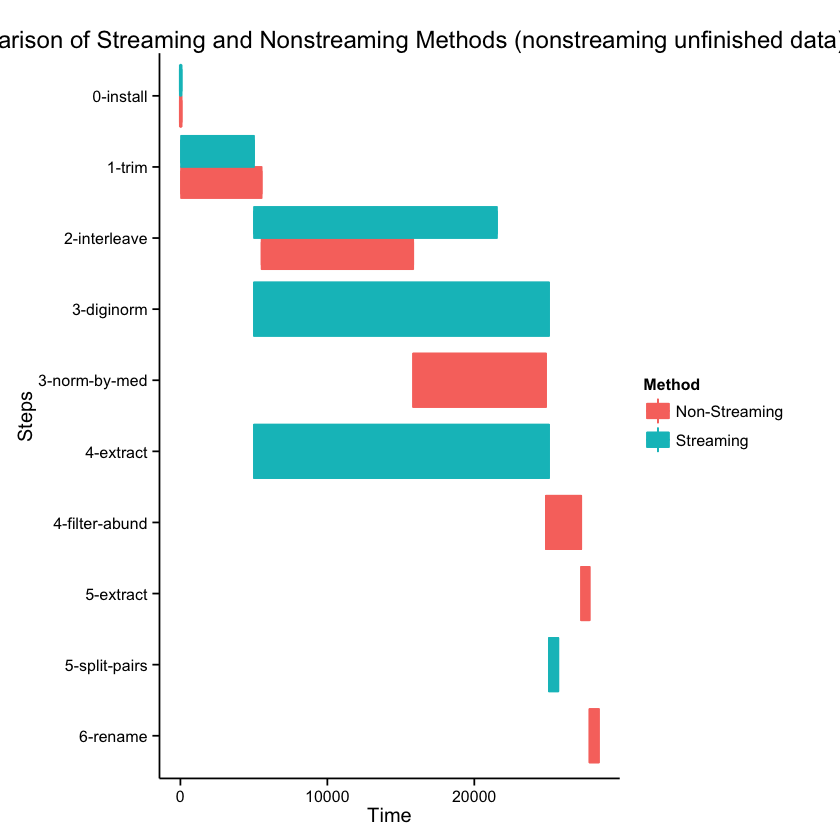

In [10]:
# designate pipeline steps as factors

comb.fake.data$Steps = as.factor(comb.fake.data$Steps)
comb.fake.data$Time = as.numeric(comb.fake.data$Time)

#method will need to contain either streaming or non-streaming, and streaming will need its own 'distributions'

plot <- ggplot(comb.fake.data, aes(x=Steps, y=Time, color = Method, fill = Method)) + ggtitle ("Comparison of Streaming and Nonstreaming Methods (nonstreaming unfinished data)")
plot <- plot + geom_boxplot(aes(fill = factor(Method))) 

# adding labels for later
#plot <- plot + scale_x_discrete(limits = rev(levels(fake.nonstream.data$Steps)), labels = rev(c("Installation", "Trimming", "Interleaving", "Digital Normalization", "Extract Reads", "Split Read Pairs")))  

plot <- plot + geom_boxplot(position = position_dodge(1))
plot <- plot + scale_x_discrete(limits = rev(levels(comb.fake.data$Steps)))
plot <- plot + coord_flip()

plot + theme_classic() # + theme(legend.position="none")